In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch import nn

In [106]:
df=pd.read_csv('/content/Student_Performance.csv')

In [107]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [109]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [110]:
df.duplicated().sum()

np.int64(127)

In [111]:
df.drop_duplicates(keep='first',inplace=True)

In [112]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [113]:
df['Extracurricular Activities']=df['Extracurricular Activities'].map({'Yes':1,'No':0})

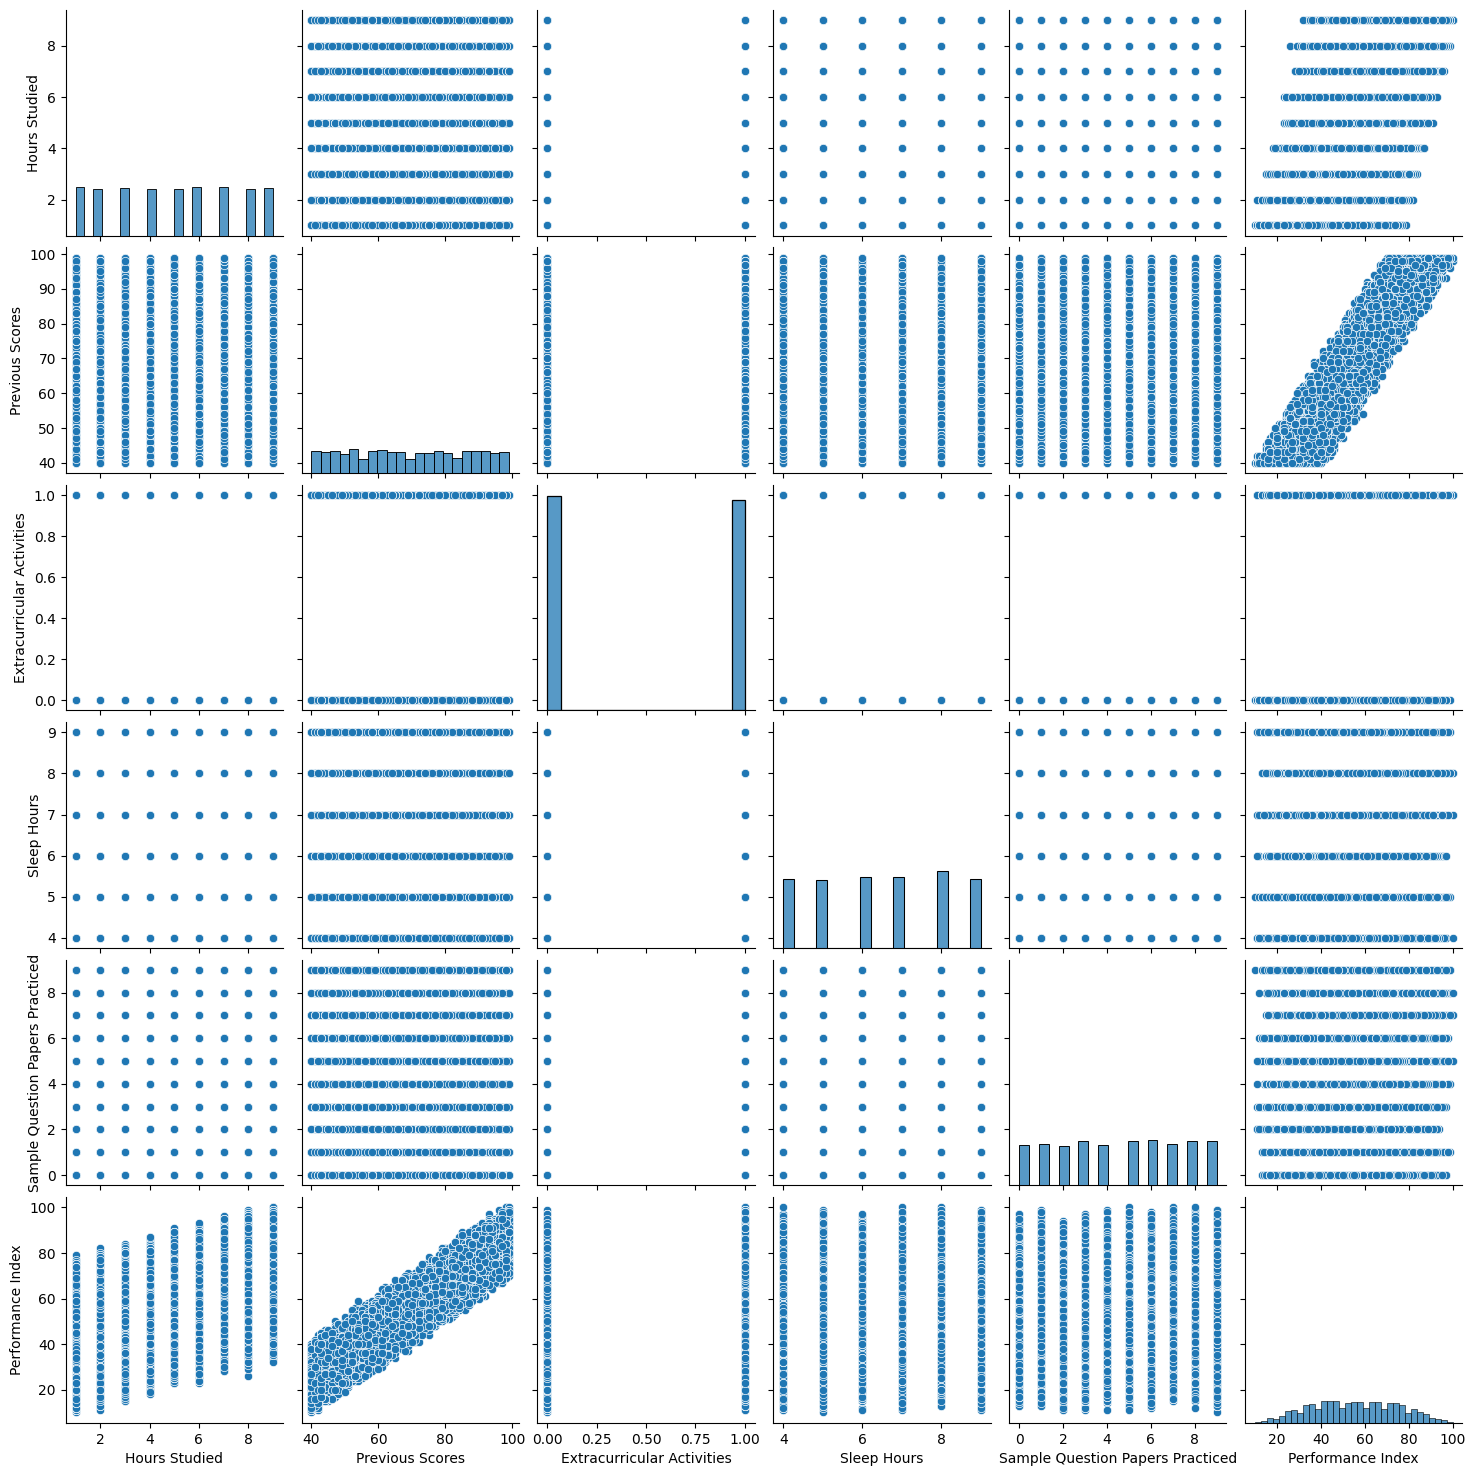

In [114]:
sns.pairplot(df)

In [115]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [116]:
tensor=torch.tensor(df.values)

In [117]:
X=torch.tensor(df[['Hours Studied',	'Previous Scores','Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced']].values,dtype=torch.float32)
Y=torch.tensor(df['Performance Index'].values,dtype=torch.float32)

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Standardized Data:\n", X_scaled)

Standardized Data:
 [[ 0.77556551  1.7061685   1.01007813  1.45402483 -1.24971491]
 [-0.38320542  0.72491187 -0.99002243 -1.49131517 -0.90092522]
 [ 1.16182248 -1.06443844  1.01007813  0.27588883 -0.90092522]
 ...
 [ 0.38930853  0.78263285  1.01007813  0.86495683  0.14544385]
 [ 1.54807946  1.59072654  1.01007813  0.27588883 -1.59850461]
 [ 0.77556551  0.26314405 -0.99002243  0.86495683 -1.24971491]]


In [119]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(torch.tensor(X_scaled,dtype=torch.float32) , Y , test_size = 0.25 , random_state = 69)

In [120]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(in_features=5,out_features=1)
  def forward(self,x):
    return self.linear(x)

torch.manual_seed(69)
model1=LinearRegression()
model1.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.3039,  0.2720, -0.3387,  0.0277,  0.1473]])),
             ('linear.bias', tensor([-0.0825]))])

In [121]:
lossf=nn.MSELoss()
optimizer=torch.optim.SGD(params=model1.parameters(),lr=0.01)

In [122]:
torch.manual_seed(69)
epochs=1000
for epoch in range(epochs):
  model1.train()
  y_pred=model1(X_train)
  loss=lossf(y_pred.squeeze(),y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model1.eval()
  with torch.inference_mode():
    test_pred=model1(X_test)
    test_loss=lossf(y_test.squeeze(),test_pred.squeeze())

  if epoch%100==0:
    print(f"Epoch={epoch} \t Loss={loss} \t Test Loss={test_loss}")

Epoch=0 	 Loss=3425.655517578125 	 Test Loss=3242.451171875
Epoch=100 	 Loss=63.67363357543945 	 Test Loss=60.46231460571289
Epoch=200 	 Loss=5.20284366607666 	 Test Loss=5.163799285888672
Epoch=300 	 Loss=4.183088302612305 	 Test Loss=4.222779750823975
Epoch=400 	 Loss=4.165259838104248 	 Test Loss=4.209854602813721
Epoch=500 	 Loss=4.164947032928467 	 Test Loss=4.210119724273682
Epoch=600 	 Loss=4.164941310882568 	 Test Loss=4.210192680358887
Epoch=700 	 Loss=4.16494083404541 	 Test Loss=4.210200786590576
Epoch=800 	 Loss=4.164941310882568 	 Test Loss=4.210201263427734
Epoch=900 	 Loss=4.164941310882568 	 Test Loss=4.210201263427734


In [123]:
model1.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 7.3973, 17.6445,  0.3143,  0.8200,  0.5396]])),
             ('linear.bias', tensor([55.2185]))])

In [124]:
from sklearn.metrics import r2_score

model1.eval()
with torch.no_grad():
    y_pred = model1(X_test)
    r2 = r2_score(y_test.numpy(), y_pred.numpy())
    print(f"R² score on test set: {r2:.4f}")


R² score on test set: 0.9887


In [125]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="StudentPerformancePrediction.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

torch.save(obj=model1.state_dict(),f=MODEL_SAVE_PATH)
print("MOdel saved")

MOdel saved
